In [10]:
import os
import numpy as np
from PIL import Image

dataset_path = "C:\\xampp\\htdocs\\Evala\\ReColor\\ReColor-Backend\\color_dataset_varied"
color_families = ['red', 'green', 'blue']

dataset_pixels = []
labels = []

for color_name in color_families:
    folder_path = os.path.join(dataset_path, color_name)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path).convert("RGB").resize((32, 32))
        pixels = np.array(img).reshape(-1, 3)  
        dataset_pixels.append(pixels)
        labels.extend([color_name] * len(pixels))

dataset_pixels = np.vstack(dataset_pixels)  
print("✅ Dataset pixel array shape:", dataset_pixels.shape)


✅ Dataset pixel array shape: (3072000, 3)


In [11]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(dataset_pixels)
print("✅ K-Means centroids:\n", kmeans.cluster_centers_.astype(int))   

✅ K-Means centroids:
 [[ 38 129  38]
 [132  36  35]
 [ 37  37 146]
 [134 235 134]
 [228 106 107]
 [ 84  85 215]
 [ 29 192  28]
 [199  51  52]
 [198 184 215]
 [ 75 203  75]]


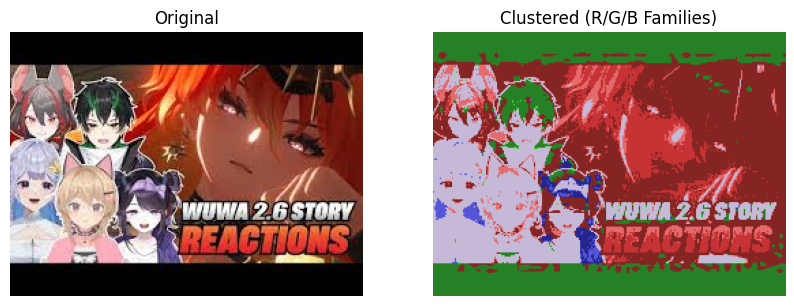

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "C:\\xampp\\htdocs\\Evala\\ReColor\\test.jpg"
image = Image.open(image_path).convert("RGB")
pixels = np.array(image)
h, w, _ = pixels.shape
pixels_2d = pixels.reshape(-1, 3)

cluster_labels = kmeans.predict(pixels_2d)
clustered_img = kmeans.cluster_centers_[cluster_labels].reshape(h, w, 3).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Clustered (R/G/B Families)")
plt.imshow(clustered_img)
plt.axis("off")
plt.show()

In [1]:
import colorsys
import numpy as np
from skimage import color

colors = {
    "red": (255, 0, 0),
    "orange": (255, 165, 0),
    "yellow": (255, 255, 0),
    "green": (0, 255, 0),
    "cyan": (0, 255, 255),
    "blue": (0, 0, 255),
    "purple": (128, 0, 128),
    "white": (255, 255, 255),
    "black": (0, 0, 0)
}

for name, rgb in colors.items():
    rgb_norm = np.array(rgb) / 255.0
    hsv = colorsys.rgb_to_hsv(*rgb_norm)
    lab = color.rgb2lab(rgb_norm.reshape(1, 1, 3)).reshape(-1)
    print(f"{name.title():<7} | RGB={rgb} | HSV=({hsv[0]*360:.1f}°, {hsv[1]:.2f}, {hsv[2]:.2f}) | Lab={np.round(lab, 2)}")


Red     | RGB=(255, 0, 0) | HSV=(0.0°, 1.00, 1.00) | Lab=[53.24 80.09 67.2 ]
Orange  | RGB=(255, 165, 0) | HSV=(38.8°, 1.00, 1.00) | Lab=[74.94 23.93 78.95]
Yellow  | RGB=(255, 255, 0) | HSV=(60.0°, 1.00, 1.00) | Lab=[ 97.14 -21.55  94.48]
Green   | RGB=(0, 255, 0) | HSV=(120.0°, 1.00, 1.00) | Lab=[ 87.74 -86.18  83.18]
Cyan    | RGB=(0, 255, 255) | HSV=(180.0°, 1.00, 1.00) | Lab=[ 91.11 -48.09 -14.13]
Blue    | RGB=(0, 0, 255) | HSV=(240.0°, 1.00, 1.00) | Lab=[  32.3    79.19 -107.86]
Purple  | RGB=(128, 0, 128) | HSV=(300.0°, 1.00, 0.50) | Lab=[ 29.78  58.93 -36.48]
White   | RGB=(255, 255, 255) | HSV=(0.0°, 0.00, 1.00) | Lab=[100.  -0.   0.]
Black   | RGB=(0, 0, 0) | HSV=(0.0°, 0.00, 0.00) | Lab=[0. 0. 0.]
